In [1]:
import pandas as pd

file_path = 'C:/Users/darks/Documents/Sales_dataset.csv'
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nSummary information of the dataset:")
df.info()

print("\nDescriptive statistics of the dataset:")
print(df.describe())


First few rows of the dataset:
          Category Category | Sub-Category             City        Country  \
0        Furniture               Bookcases        Henderson  United States   
1        Furniture                  Chairs        Henderson  United States   
2  Office Supplies                  Labels      Los Angeles  United States   
3        Furniture                  Tables  Fort Lauderdale  United States   
4  Office Supplies                 Storage  Fort Lauderdale  United States   

  Customer ID    Customer Name  Order Date        Order ID  Period  \
0    CG-12520      Claire Gute  2020-01-26  CA-2016-152156       0   
1    CG-12520      Claire Gute  2020-01-27  CA-2016-152156       0   
2    DV-13045  Darrin Van Huff  2020-01-27  CA-2016-138688       0   
3    SO-20335   Sean O'Donnell  2020-01-27  US-2015-108966       0   
4    SO-20335   Sean O'Donnell  2020-01-28  US-2015-108966       0   

   Postal Code  ...       State Sub-Category Type Of Area      Costs Discount  

In [2]:
missing_values = df.isnull().sum()

missing_values[missing_values > 0]


Type Of Area    11718
Sales            1553
dtype: int64

'type of Area', is a coloumn which is complate empty, since I find these coloumn name from other dataset, the dataset which I gathered does not have any data about types of area so i decided to delete this coloumn.

We already have a coloumn 'Sub-Category so we dont need any more 'Category | Sub-Category'.

In [3]:
df.drop(columns=['Type Of Area'], inplace=True)
df.drop(columns=['Category | Sub-Category'], inplace=True)

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Sales    1553
dtype: int64

In Sale coloumn I do have some missing value too, I decided to use mean of each of sub-category for that cell

In [5]:
df['Sales'] = df.groupby('Sub-Category')['Sales'].transform(lambda x: x.fillna(x.mean()))


In [6]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

starting EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Sales Distribution Analysis

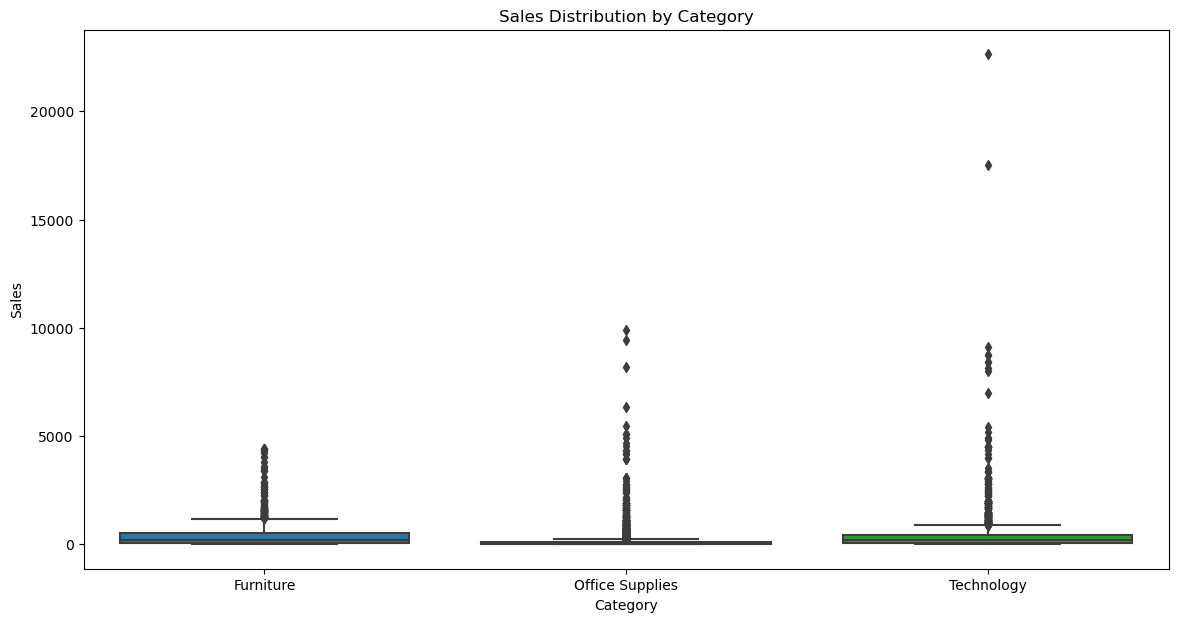

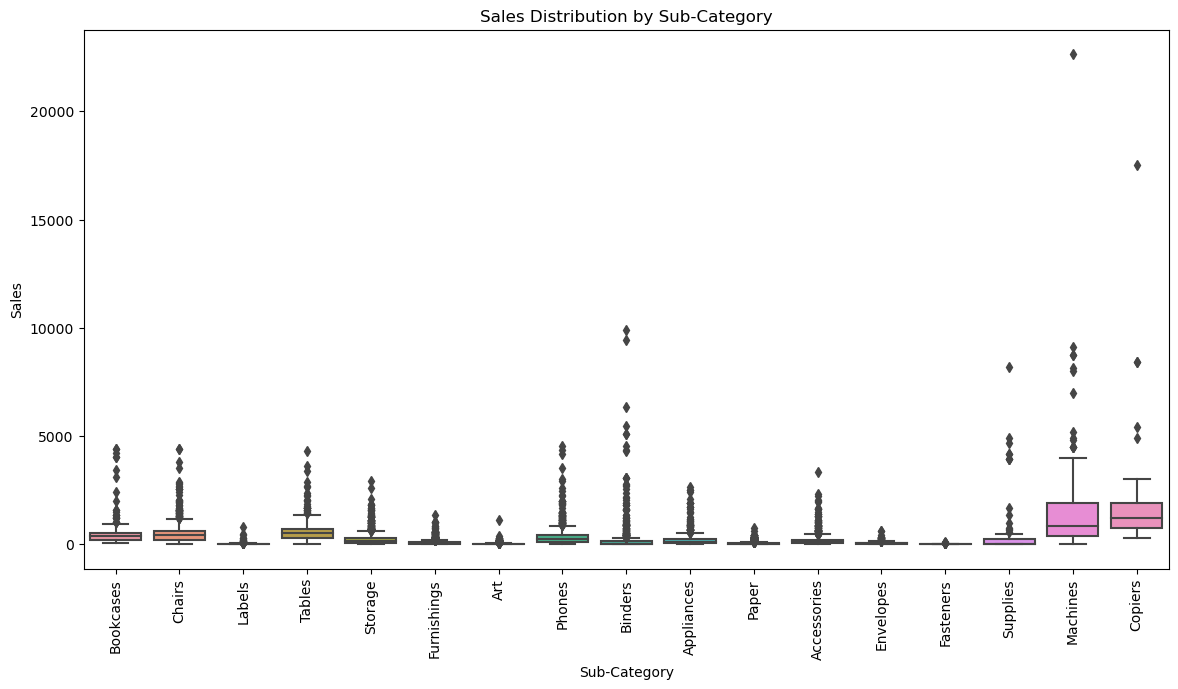

In [8]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.xticks(rotation=90)
plt.title('Sales Distribution by Sub-Category')
plt.show()

Profitability Analysis

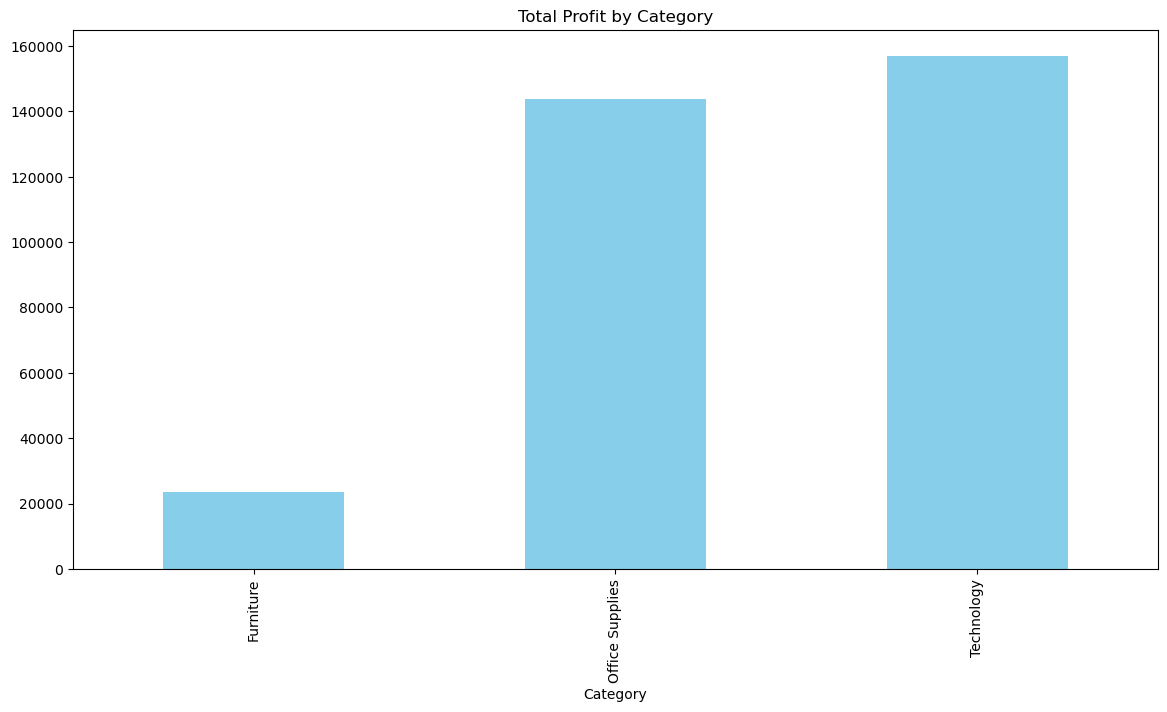

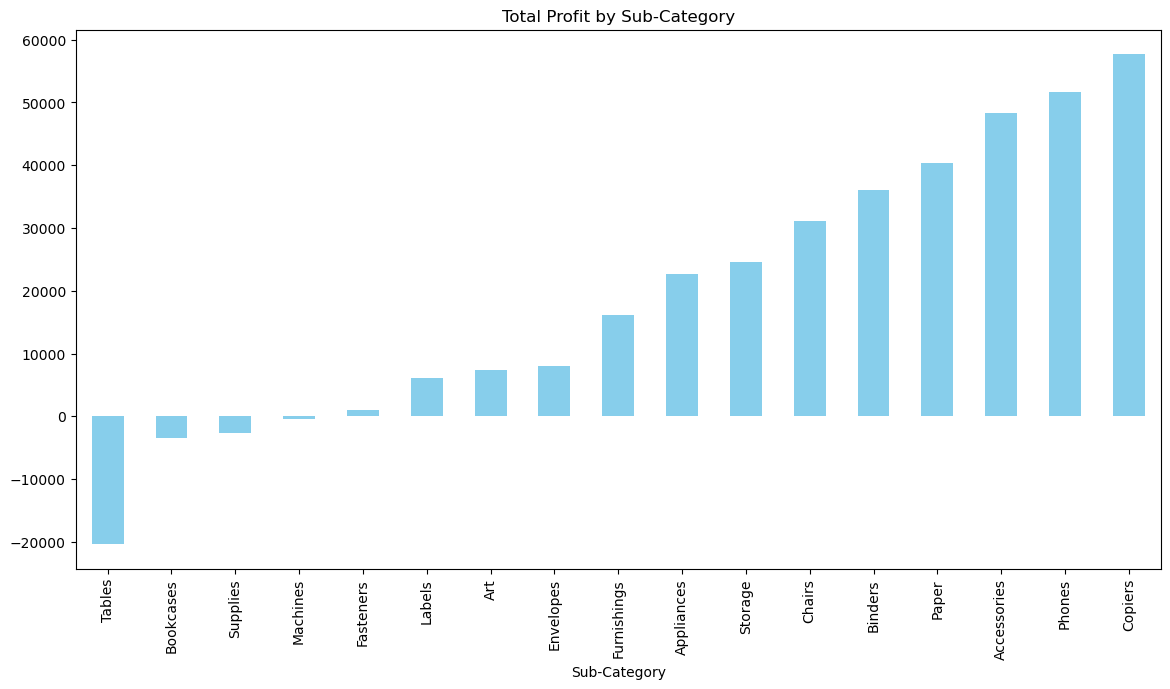

In [9]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values()
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(14, 7))
category_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Category')
plt.show()

plt.figure(figsize=(14, 7))
sub_category_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=90)
plt.show()

Sales and Profit Correlation

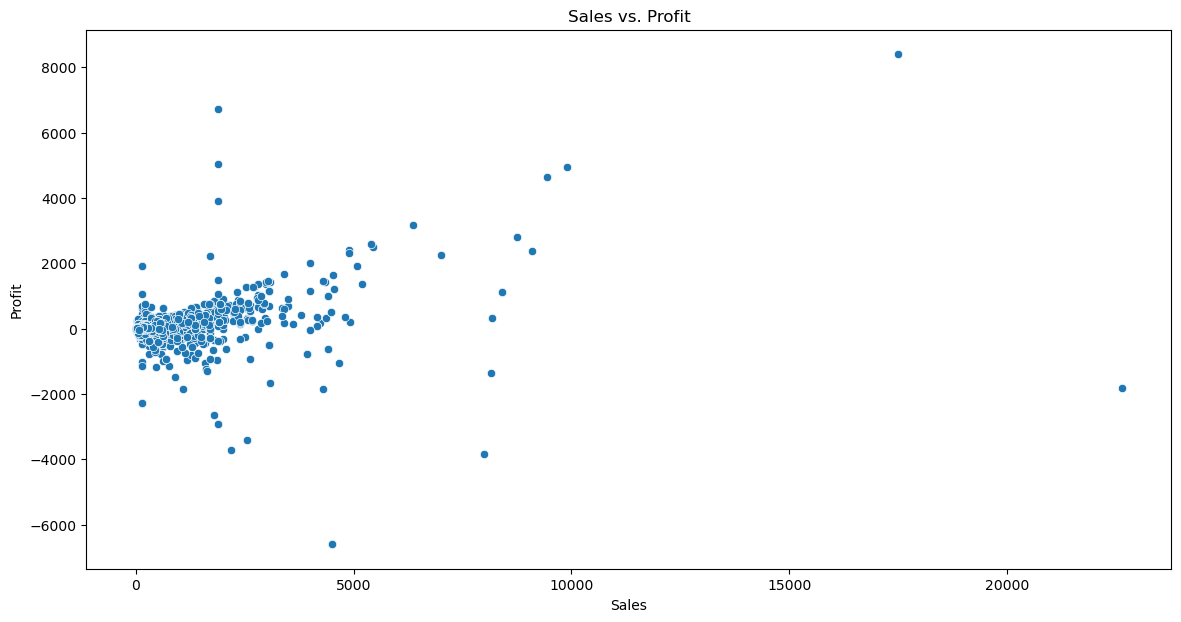

In [10]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')
plt.show()

Customer Analysis

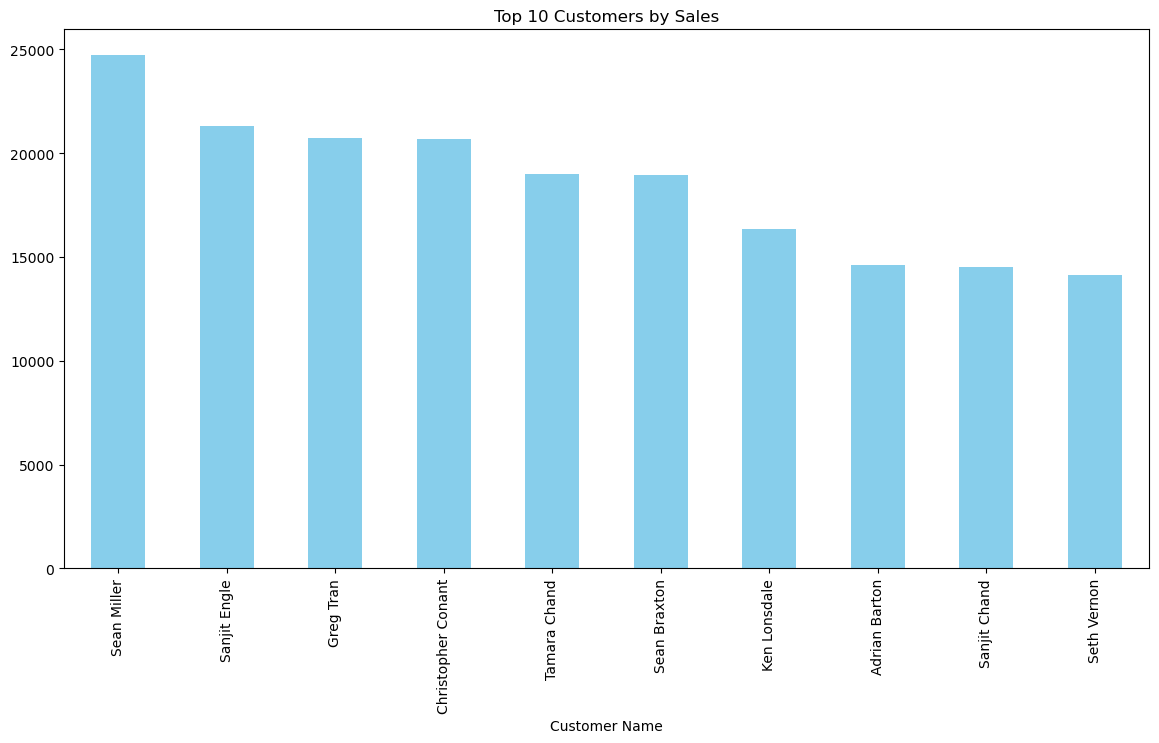

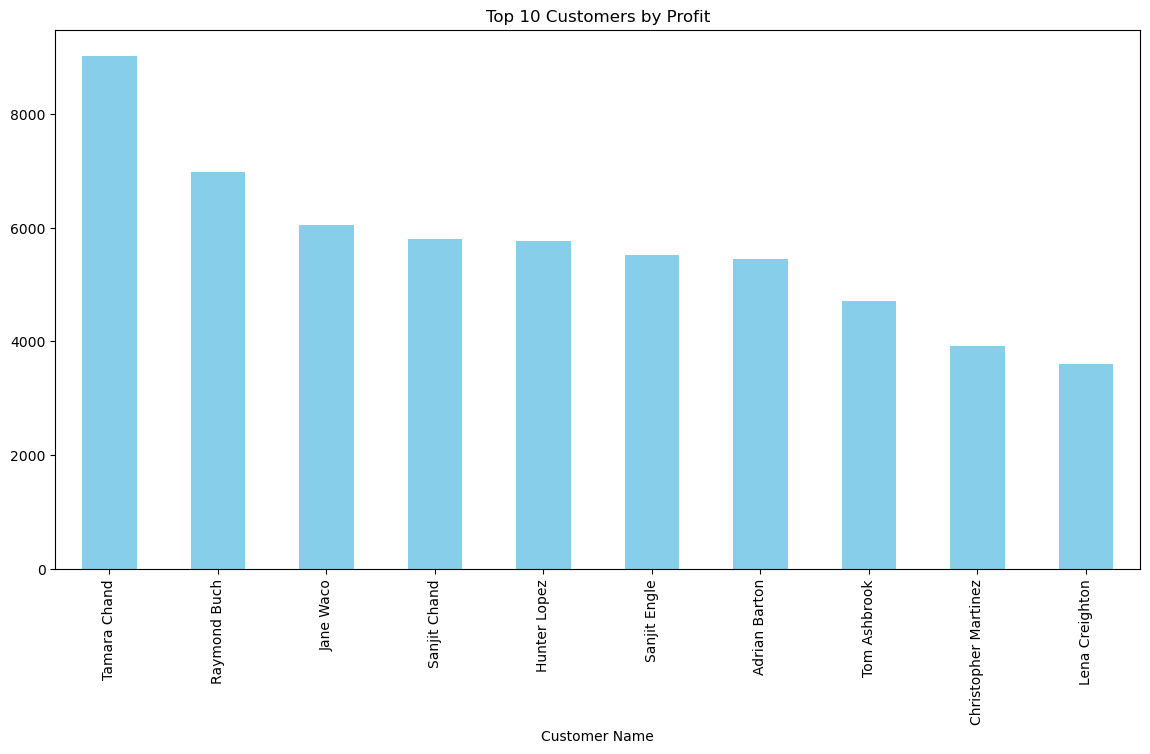

In [11]:
top_customers_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 7))
top_customers_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Sales')
plt.show()

plt.figure(figsize=(14, 7))
top_customers_profit.plot(kind='bar', color='skyblue')
plt.title('Top 10 Customers by Profit')
plt.show()

Geographical Analysis

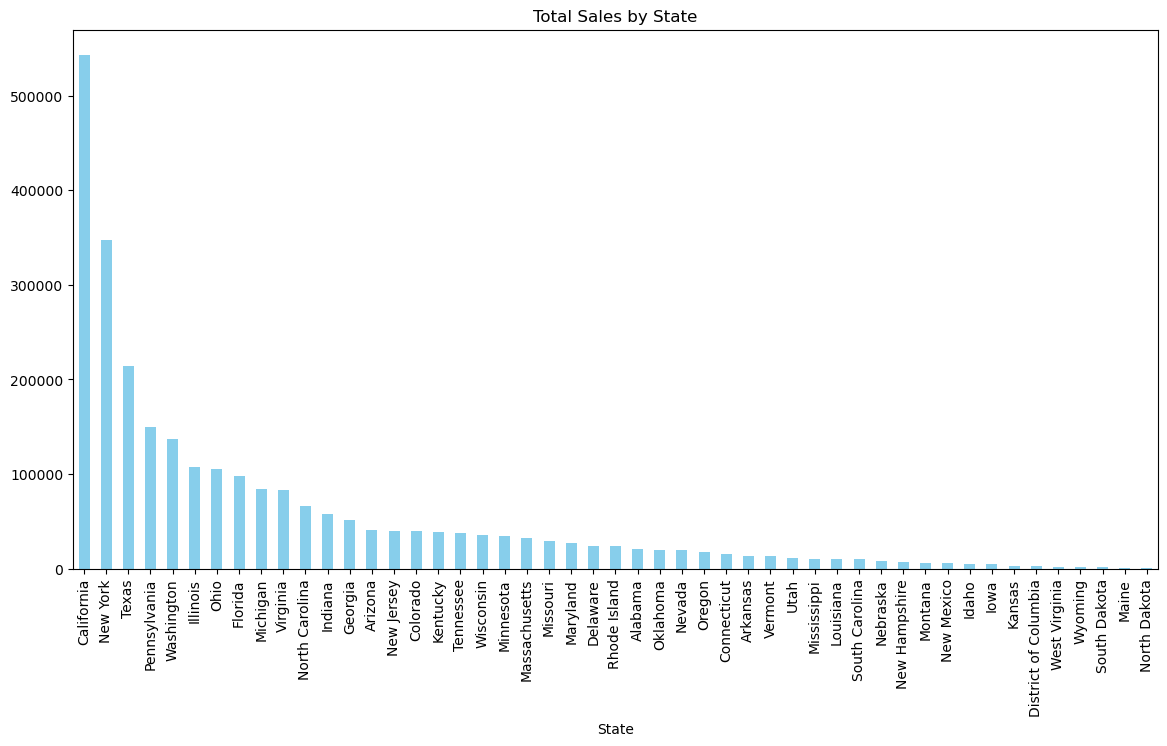

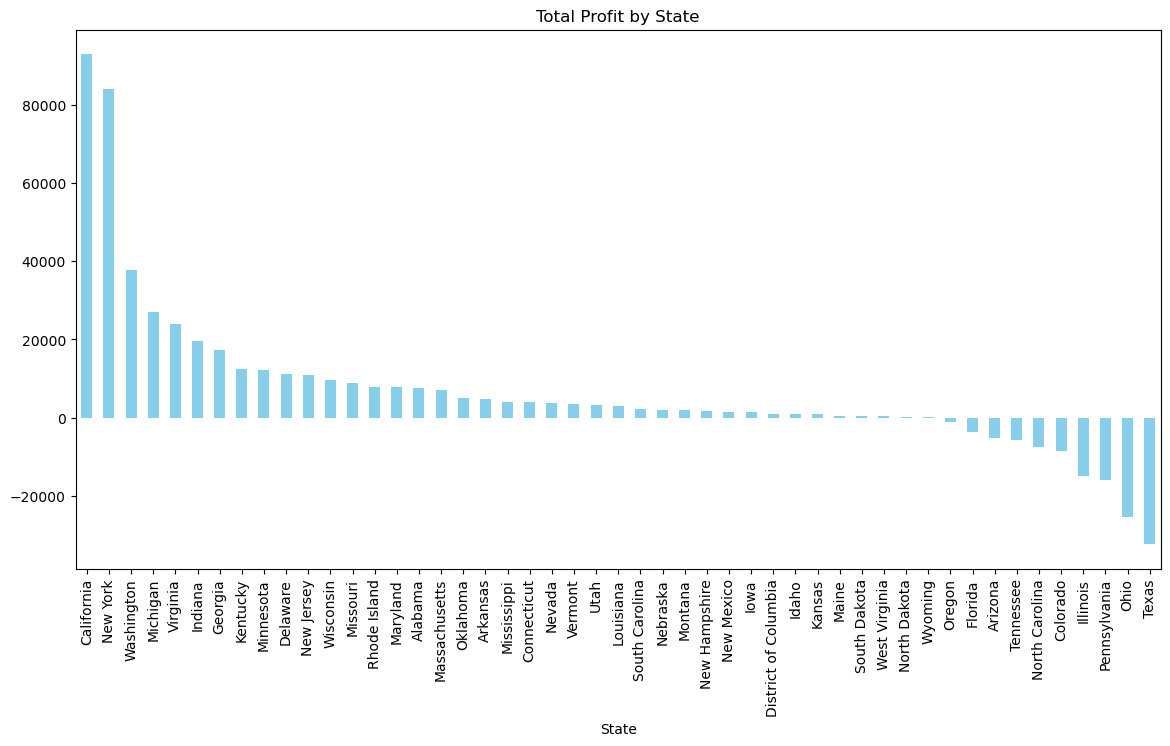

In [12]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
state_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
state_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by State')
plt.xticks(rotation=90)
plt.show()

Discount Impact Analysis

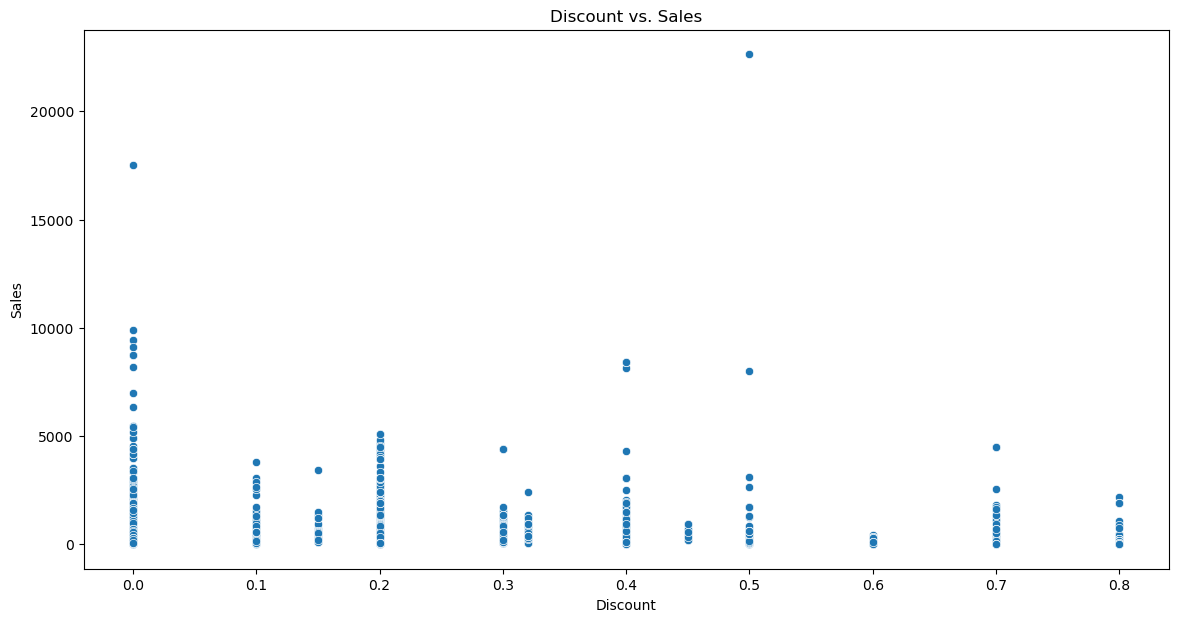

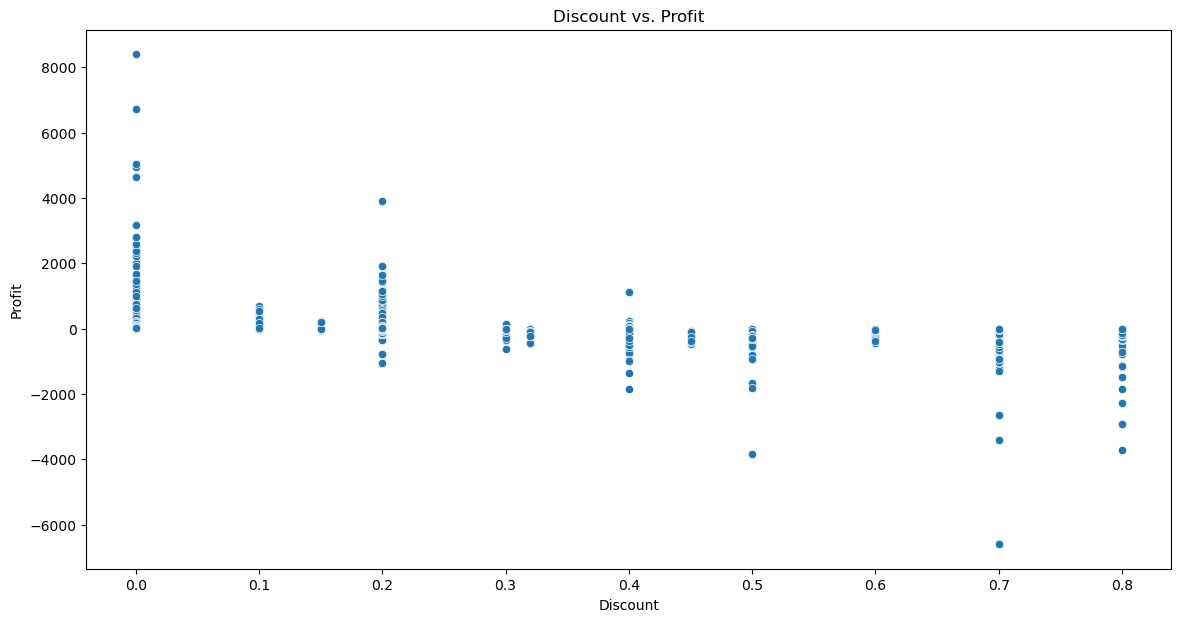

In [13]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Discount vs. Sales')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.show()

Time Series Analysis

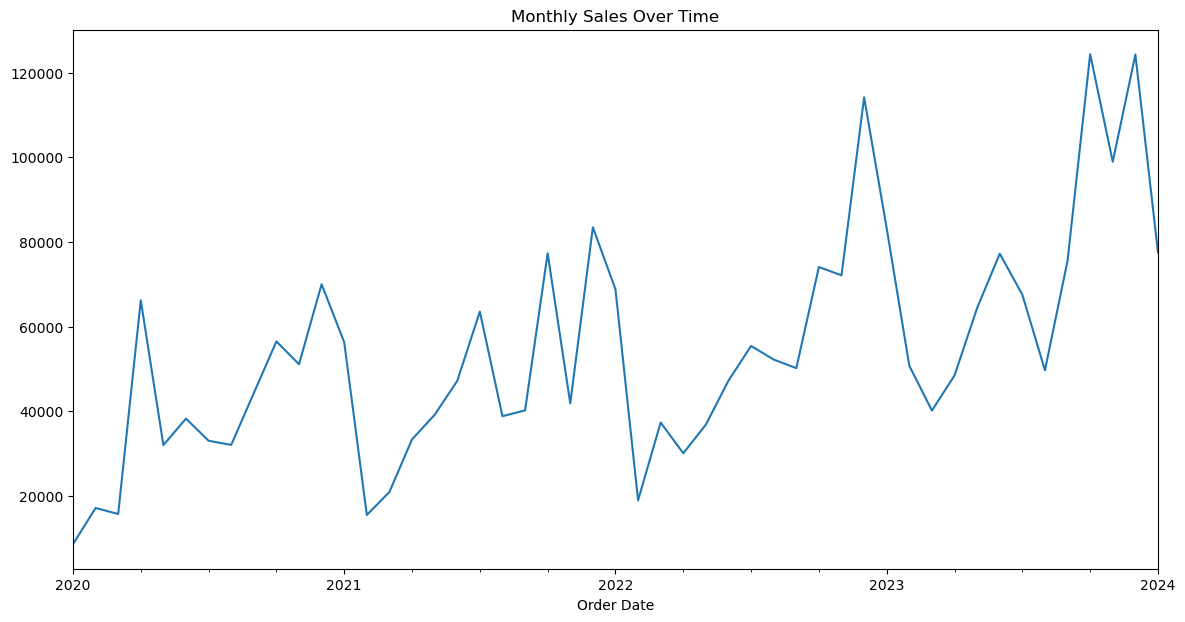

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Here we set 'Order Date' as the index, then we return it
df.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency and compute the sum of sales
monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(14, 7))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.show()

Statistical Testing

In [15]:
#1.Linear Regression
import statsmodels.api as sm

X = df[['Quantity', 'Discount']]
y = df['Sales']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     210.1
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           2.36e-90
Time:                        17:36:41   Log-Likelihood:                -90782.
No. Observations:               11718   AIC:                         1.816e+05
Df Residuals:                   11715   BIC:                         1.816e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9044     10.905      4.576      0.0

"OLS Regression Results". OLS stands for Ordinary Least Squares, which is a method used to estimate the parameters in a linear regression model.

the regression equation is 54.4723. This represents the expected value of Sales when both Quantity and Discount are zero.

The coefficient 46.7124 indicates that for each unit increase in Quantity, Sales are expected to increase by approximately 46.71 units, holding other variables constant.

The coefficient -18.3589 suggests that there is a negative relationship between Discount and Sales, but it is not statistically significant (P>|t| = 0.467 > 0.05). This implies that Discount may not have a significant impact on Sales in this model.

In [16]:
# 2. A/B Testing:

from scipy import stats

# Assuming 'Profitable or not?' column has 'Yes' and 'No' groups for A/B testing
group_a = df[df['Profitable or not?'] == 'Yes']['Sales']
group_b = df[df['Profitable or not?'] == 'No']['Sales']
t_stat, p_val = stats.ttest_ind(group_a, group_b)
print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-statistic: -4.503476171236326, P-value: 6.7496845537518215e-06


Profitable group has lower mean than non-profitable, so we can say that in general this dataset wants to tell us the whole sale was not profitablw (T-s = = -4.5)

P-value suggests that the difference in means between profitable group and group B is statistically significant

In [17]:
print(df.head())

                   Category             City        Country Customer ID  \
Order Date                                                                
2020-01-26        Furniture        Henderson  United States    CG-12520   
2020-01-27        Furniture        Henderson  United States    CG-12520   
2020-01-27  Office Supplies      Los Angeles  United States    DV-13045   
2020-01-27        Furniture  Fort Lauderdale  United States    SO-20335   
2020-01-28  Office Supplies  Fort Lauderdale  United States    SO-20335   

              Customer Name        Order ID  Period  Postal Code  \
Order Date                                                         
2020-01-26      Claire Gute  CA-2016-152156       0        42420   
2020-01-27      Claire Gute  CA-2016-152156       0        42420   
2020-01-27  Darrin Van Huff  CA-2016-138688       0        90036   
2020-01-27   Sean O'Donnell  US-2015-108966       0        33311   
2020-01-28   Sean O'Donnell  US-2015-108966       0        33311  

now, we there is a problem here, order date act like a index, we need to change it to formal shape

In [18]:
df.reset_index(inplace=True)

In [19]:
print(df.head())

  Order Date         Category             City        Country Customer ID  \
0 2020-01-26        Furniture        Henderson  United States    CG-12520   
1 2020-01-27        Furniture        Henderson  United States    CG-12520   
2 2020-01-27  Office Supplies      Los Angeles  United States    DV-13045   
3 2020-01-27        Furniture  Fort Lauderdale  United States    SO-20335   
4 2020-01-28  Office Supplies  Fort Lauderdale  United States    SO-20335   

     Customer Name        Order ID  Period  Postal Code       Product ID  ...  \
0      Claire Gute  CA-2016-152156       0        42420  FUR-BO-10001798  ...   
1      Claire Gute  CA-2016-152156       0        42420  FUR-CH-10000454  ...   
2  Darrin Van Huff  CA-2016-138688       0        90036  OFF-LA-10000240  ...   
3   Sean O'Donnell  US-2015-108966       0        33311  FUR-TA-10000577  ...   
4   Sean O'Donnell  US-2015-108966       0        33311  OFF-ST-10000760  ...   

        Ship Mode       State  Sub-Category      C

In [20]:
# saving Dataset
file_path = 'C:/Users/darks/Documents/Cleaned_Sale_Dataset.csv'
df.to_csv(file_path, index=False)
print(f"Dataset saved successfully as '{file_path}'")

Dataset saved successfully as 'C:/Users/darks/Documents/Cleaned_Sale_Dataset.csv'


In [21]:
# connecting Dataset to mysql

from sqlalchemy import create_engine

# My database connection details
user = 'root'
password = 'Ali1375'
host = 'localhost'
port = 3306


file_path = 'C:/Users/darks/Documents/Cleaned_Sale_Dataset.csv'

# Table name Which I want for MySQL 
table_name = 'Cleaned_Sale_Dataset'

# Creating the connection engine
try:
    db = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')
    print("Connection to MySQL DB successful")
except Exception as e:
    print(f"Error connecting to MySQL DB: {e}")


try:
    df = pd.read_csv(file_path)
    df.to_sql(table_name, con=db, if_exists='replace', index=False)
    print(f'{file_path} has been imported into the table {table_name}')
except FileNotFoundError:
    print(f'File {file_path} not found.')
except Exception as e:
    print(f'Error importing {file_path} into MySQL DB: {e}')
finally:
    if 'db' in locals():
        db.dispose()  # At the end I want to close the database connection



Error connecting to MySQL DB: name 'database' is not defined
Error importing C:/Users/darks/Documents/Cleaned_Sale_Dataset.csv into MySQL DB: name 'db' is not defined


After runing some line of code in mysql, I found out in some rows, profit =! (sales - costs) this data need to be remove, since python is much more faster, I remove them by help of python


In [22]:
from sqlalchemy import create_engine, text

# Database connection details
user = 'root'
password = 'Ali1375'
host = 'localhost'
port = 3306
database = 'sale_p'  # Replace with your database name

# Creating the connection engine
try:
    db = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')
    print("Connection to MySQL DB successful")
except Exception as e:
    print(f"Error connecting to MySQL DB: {e}")

# Define the SQL query to delete rows where profit != (sales - costs)
delete_query = """
DELETE FROM cleaned_sale_dataset
WHERE ROUND(profit, 2) != ROUND((sales - costs), 2)
"""

# Execute the delete query
try:
    with db.connect() as conn:
        result = conn.execute(text(delete_query))
        print(f"Deleted {result.rowcount} rows where profit != (sales - costs)")
except Exception as e:
    print(f"Error executing delete query: {e}")


Connection to MySQL DB successful
Deleted 0 rows where profit != (sales - costs)


There are some isues here, which need to be fix:
1. names of some coloumns are not easy use in sql, so I want to change them ( between the words by default there is space, we want to replace it by _
2. we do have two coloumns by names of: 1. Category | Sub-Category 2. Sub-Category .
they have same data, so I want to delete one of them (but first I run a code to be sure).
3. the format of date in coloumns ship_date and order_date need to be change.
4. the position of row_id is not acceptable, it should be the first coloumn.
5. some coloumns have a lot decimals number, I want to round them to 3 decimal.

In [23]:
file_path = 'C:/Users/darks/Documents/Cleaned_Sale_Dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the summary information of the dataset
print("\nSummary information of the dataset:")
df.info()

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Rename columns
df.rename(columns={
    'Row ID': 'Row_ID',
    'Order ID': 'Order_ID',
    'Customer ID': 'Customer_ID',
    'Customer Name': 'Customer_Name',
    'Type Of Area': 'Type_Of_Area',
    'Sub-Category': 'Sub_Category',
    'Profitable or not?': 'Profitable?',
    'S C P': 'SCP',
    'Ship Mode': 'Ship_Mode',
    'Order Date': 'Order_Date',
    'Ship Date': 'Ship_Date',
    'Postal Code': 'Postal_Code',
    'Product ID': 'Product_ID'
}, inplace=True)

First few rows of the dataset:
   Order Date         Category             City        Country Customer ID  \
0  2020-01-26        Furniture        Henderson  United States    CG-12520   
1  2020-01-27        Furniture        Henderson  United States    CG-12520   
2  2020-01-27  Office Supplies      Los Angeles  United States    DV-13045   
3  2020-01-27        Furniture  Fort Lauderdale  United States    SO-20335   
4  2020-01-28  Office Supplies  Fort Lauderdale  United States    SO-20335   

     Customer Name        Order ID  Period  Postal Code       Product ID  ...  \
0      Claire Gute  CA-2016-152156       0        42420  FUR-BO-10001798  ...   
1      Claire Gute  CA-2016-152156       0        42420  FUR-CH-10000454  ...   
2  Darrin Van Huff  CA-2016-138688       0        90036  OFF-LA-10000240  ...   
3   Sean O'Donnell  US-2015-108966       0        33311  FUR-TA-10000577  ...   
4   Sean O'Donnell  US-2015-108966       0        33311  OFF-ST-10000760  ...   

        Ship 

In [24]:
print("First few rows of the dataset:")
print(df.head())

print("\nSummary information of the dataset:")
df.info()

First few rows of the dataset:
   Order_Date         Category             City        Country Customer_ID  \
0  2020-01-26        Furniture        Henderson  United States    CG-12520   
1  2020-01-27        Furniture        Henderson  United States    CG-12520   
2  2020-01-27  Office Supplies      Los Angeles  United States    DV-13045   
3  2020-01-27        Furniture  Fort Lauderdale  United States    SO-20335   
4  2020-01-28  Office Supplies  Fort Lauderdale  United States    SO-20335   

     Customer_Name        Order_ID  Period  Postal_Code       Product_ID  ...  \
0      Claire Gute  CA-2016-152156       0        42420  FUR-BO-10001798  ...   
1      Claire Gute  CA-2016-152156       0        42420  FUR-CH-10000454  ...   
2  Darrin Van Huff  CA-2016-138688       0        90036  OFF-LA-10000240  ...   
3   Sean O'Donnell  US-2015-108966       0        33311  FUR-TA-10000577  ...   
4   Sean O'Donnell  US-2015-108966       0        33311  OFF-ST-10000760  ...   

        Ship_

In [25]:
print("Data type of 'Order_Date':", df['Order_Date'].dtype)
print("Data type of 'Ship_Date':", df['Ship_Date'].dtype)

Data type of 'Order_Date': object
Data type of 'Ship_Date': object


In [26]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

In [27]:
cols = ['Row_ID'] + [col for col in df.columns if col != 'Row_ID']
df = df[cols]

In [28]:
df['Sales'] = df['Sales'].round(3)
df['Profit'] = df['Profit'].round(3)
df['SCP'] = df['SCP'].round(3)
df['Costs'] = df['Costs'].round(3)

In [29]:
print("\nUpdated DataFrame:")
print(df.head())


Updated DataFrame:
   Row_ID Order_Date         Category             City        Country  \
0       1 2020-01-26        Furniture        Henderson  United States   
1       2 2020-01-27        Furniture        Henderson  United States   
2       3 2020-01-27  Office Supplies      Los Angeles  United States   
3       4 2020-01-27        Furniture  Fort Lauderdale  United States   
4       5 2020-01-28  Office Supplies  Fort Lauderdale  United States   

  Customer_ID    Customer_Name        Order_ID  Period  Postal_Code  ...  \
0    CG-12520      Claire Gute  CA-2016-152156       0        42420  ...   
1    CG-12520      Claire Gute  CA-2016-152156       0        42420  ...   
2    DV-13045  Darrin Van Huff  CA-2016-138688       0        90036  ...   
3    SO-20335   Sean O'Donnell  US-2015-108966       0        33311  ...   
4    SO-20335   Sean O'Donnell  US-2015-108966       0        33311  ...   

        Ship_Mode       State Sub_Category     Costs Discount   Profit  \
0    Secon

In [30]:
df.to_csv('C:/Users/darks/Documents/Updated_Sales_p.csv', index=False)

In [43]:
user = 'root'
password = 'Ali1375'
host = 'localhost'
port = 3306
database = 'Sale_P'  

file_path = 'C:/Users/darks/Documents/Updated_Sales_p.csv'

try:
    db = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')
    print("Connection to MySQL DB successful")
except Exception as e:
    print(f"Error connecting to MySQL DB: {e}")

try:
    df = pd.read_csv(file_path)
    print(f'{file_path} loaded successfully.')
except FileNotFoundError:
    print(f'File {file_path} not found.')
    raise
except Exception as e:
    print(f'Error loading {file_path}: {e}')
    raise

# Extract tables
customers = df[['Customer_ID', 'Customer_Name', 'City', 'State', 'Country']].drop_duplicates(subset='Customer_ID')
orders = df[['Order_ID', 'Order_Date', 'Ship_Mode', 'Period', 'Customer_ID', 'Sub_Category', 'Ship_Date']].drop_duplicates(subset='Order_ID')
products = df[['Category', 'Sub_Category']].drop_duplicates()
sales = df[['Row_ID', 'Order_ID', 'Customer_ID', 'Costs', 'Discount', 'Profit', 'Profitable?', 'Quantity', 'SCP', 'Sales', 'Sub_Category']].drop_duplicates(subset='Row_ID')

# Define table names
customers_table = 'Customers'
orders_table = 'Orders'
products_table = 'Products'
sales_table = 'Sales'

# Function to upload a DataFrame to MySQL
def upload_to_mysql(df, table_name):
    try:
        df.to_sql(table_name, con=db, if_exists='replace', index=False)
        print(f'Table {table_name} has been created and data inserted.')
    except Exception as e:
        print(f'Error importing data into table {table_name}: {e}')

# Upload tables to MySQL
upload_to_mysql(customers, customers_table)
upload_to_mysql(orders, orders_table)
upload_to_mysql(products, products_table)
upload_to_mysql(sales, sales_table)

# Close the database connection
if 'db' in locals():
    db.dispose()
    print("Database connection closed.")



Connection to MySQL DB successful
C:/Users/darks/Documents/Updated_Sales_p.csv loaded successfully.


C:\Users\darks\AppData\Local\Temp\ipykernel_5536\390970366.py:40: UserWarning: The provided table name 'Customers' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql(table_name, con=db, if_exists='replace', index=False)


Table Customers has been created and data inserted.


C:\Users\darks\AppData\Local\Temp\ipykernel_5536\390970366.py:40: UserWarning: The provided table name 'Orders' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql(table_name, con=db, if_exists='replace', index=False)
C:\Users\darks\AppData\Local\Temp\ipykernel_5536\390970366.py:40: UserWarning: The provided table name 'Products' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql(table_name, con=db, if_exists='replace', index=False)


Table Orders has been created and data inserted.
Table Products has been created and data inserted.
Table Sales has been created and data inserted.
Database connection closed.


C:\Users\darks\AppData\Local\Temp\ipykernel_5536\390970366.py:40: UserWarning: The provided table name 'Sales' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql(table_name, con=db, if_exists='replace', index=False)


Now, my tables are ready, so I have tables Customers, Orders, Products and Sales.
It is time to give rule ro each coloumn in mysql also identify their format.

we have to run this code: (for each table seprataly we have to run)


Alter TABLE Customers (
    Customer_ID VARCHAR(255) PRIMARY KEY,
    Customer_Name VARCHAR(255),
    City VARCHAR(255),
    State VARCHAR(255),
    Country VARCHAR(255)
);


Alter TABLE Orders (
    Order_ID VARCHAR(255) PRIMARY KEY,
    Order_Date DATE,
    Ship_Mode VARCHAR(255),
    Period INT,
    Customer_ID VARCHAR(255),
    Sub_Category VARCHAR(255),
    Ship_Date VARCHAR(255)
    FOREIGN KEY (Customer_ID) REFERENCES Customers(Customer_ID)
);


Alter TABLE Products (
    Category VARCHAR(255),
    SubCategory VARCHAR(255),
    PRIMARY KEY (Category, SubCategory)
);


Alter TABLE Sales (
    Row_ID INT PRIMARY KEY,
    Order_ID VARCHAR(255),
    Customer_ID VARCHAR(255),
    Costs DECIMAL(20, 3),
    Discount DECIMAL(5, 3),
    Profit DECIMAL(20, 3),
    Profitable ENUM('Yes', 'No'),
    Quantity INT,
    SCP DECIMAL(20, 3),
    Sales DECIMAL(20, 3),
    Sub_Category VARCHAR(255),
    FOREIGN KEY (Order_ID) REFERENCES Orders(Order_ID),
    FOREIGN KEY (Customer_ID) REFERENCES Customers(Customer_ID)
);
